# Imports 👇

In [108]:
import pandas
import numpy
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report
import seaborn
import matplotlib.pyplot as pyplot
from mpl_toolkits import mplot3d

In [125]:
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (15, 12)

## Data Reading 👇

In [2]:
classes_list=['Low Stress','Normal Stress','High Stress']

In [3]:
data=pandas.read_csv('./Stress-Lysis.csv')

In [4]:
data

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0
...,...,...,...,...
1996,21.82,90.82,96,1
1997,10.45,79.45,45,0
1998,27.22,96.22,135,2
1999,12.46,81.46,64,0


In [5]:
data.describe()

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


In [7]:
data['Stress Level'].value_counts()

1    790
2    710
0    501
Name: Stress Level, dtype: int64

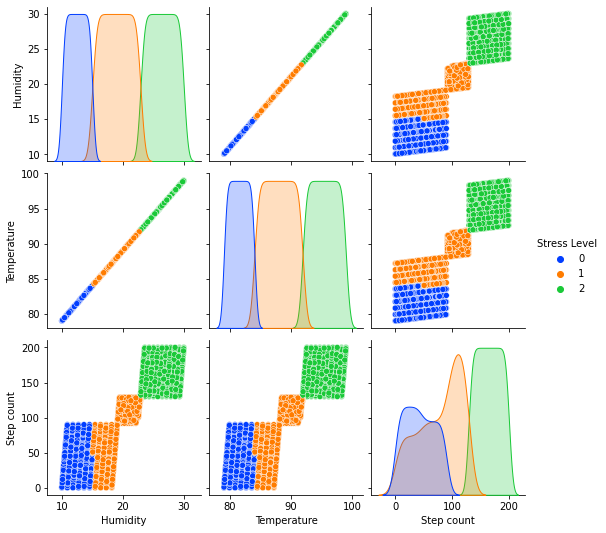

In [55]:
seaborn.pairplot(data, hue="Stress Level",palette="bright")

Text(0.5, 0, 'Step count')

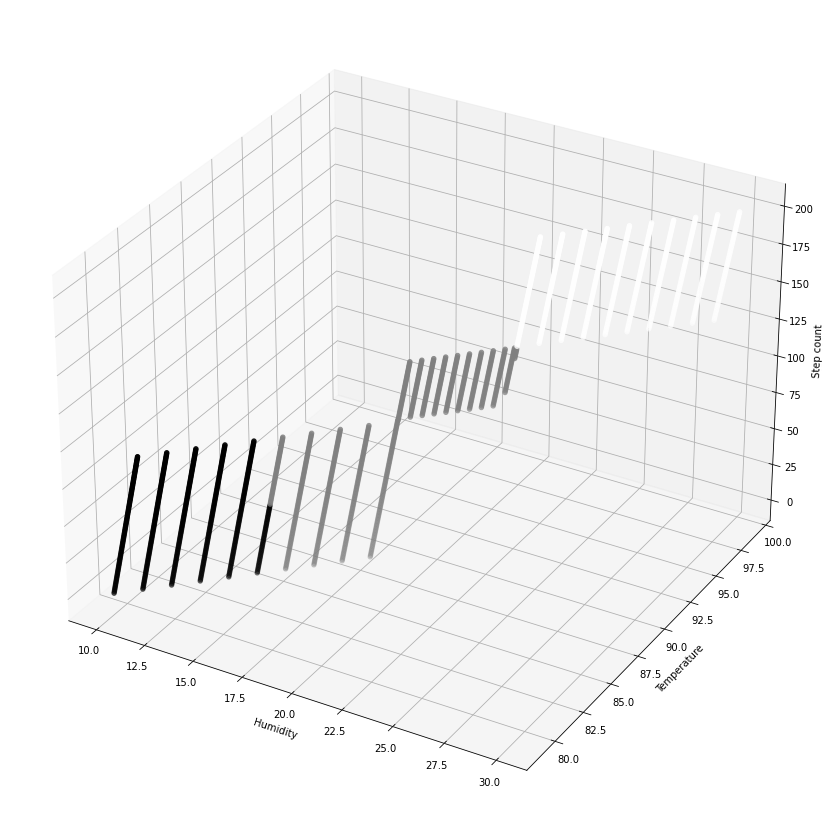

In [115]:
plotter = pyplot.subplot(projection='3d')
plotter.scatter3D(data.to_numpy()[:, 0], data.to_numpy()[:, 1] ,data.to_numpy()[:, 2],c=data['Stress Level'], cmap='gray')
plotter.set_xlabel('Humidity')
plotter.set_ylabel('Temperature')
plotter.set_zlabel('Step count')

### Suffling the data set 👇
this is to get splitted data, that have all type of the classes in training and testing
when we split the data set then their can be chances of all dead value rows can go in training and no row for the alive cases
hence at the time of model implementation model will only know the dead cases and not alive cases, that result in underfittiing ans will give high error at the time of prediction

In [10]:
shuffled_Data=data.sample(frac=1)

## Splitting the dataset into training and testing 👇

For Training 80% data is being used and for testing 20% data is used from the given data

means 4088 rows will be used for training and 49 rows will be used for testing

In [56]:
Training_Data = shuffled_Data[:1600]
Testing_Data = shuffled_Data[1600:]

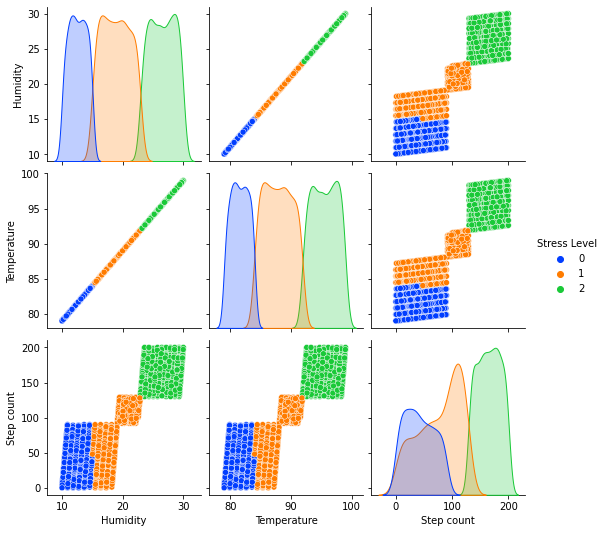

In [59]:
seaborn.pairplot(Training_Data, hue="Stress Level",palette="bright")

Text(0.5, 0, 'Step count')

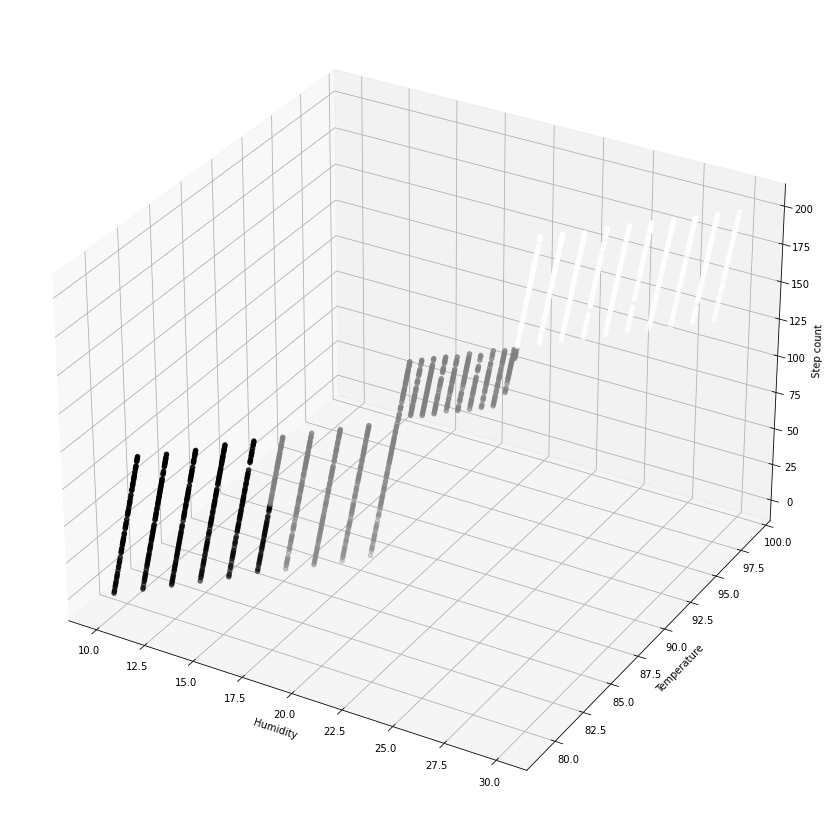

In [116]:
plotter = pyplot.subplot(projection='3d')
plotter.scatter3D(Training_Data.to_numpy()[:, 0], Training_Data.to_numpy()[:, 1] ,Training_Data.to_numpy()[:, 2],c=Training_Data['Stress Level'], cmap='gray')
plotter.set_xlabel('Humidity')
plotter.set_ylabel('Temperature')
plotter.set_zlabel('Step count')

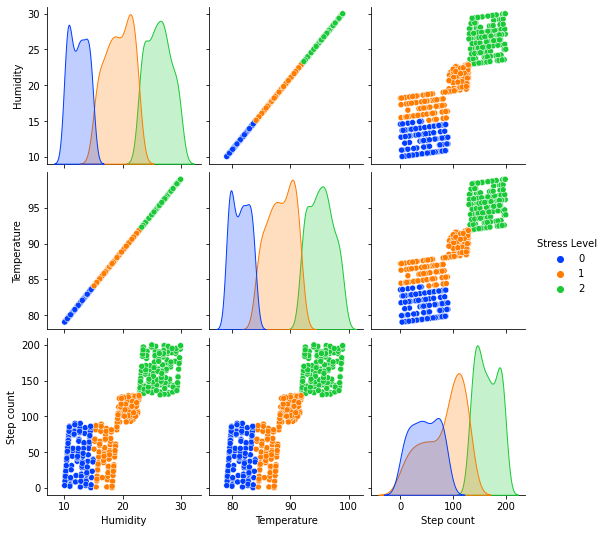

In [60]:
seaborn.pairplot(Testing_Data, hue="Stress Level",palette="bright")

Text(0.5, 0, 'Step count')

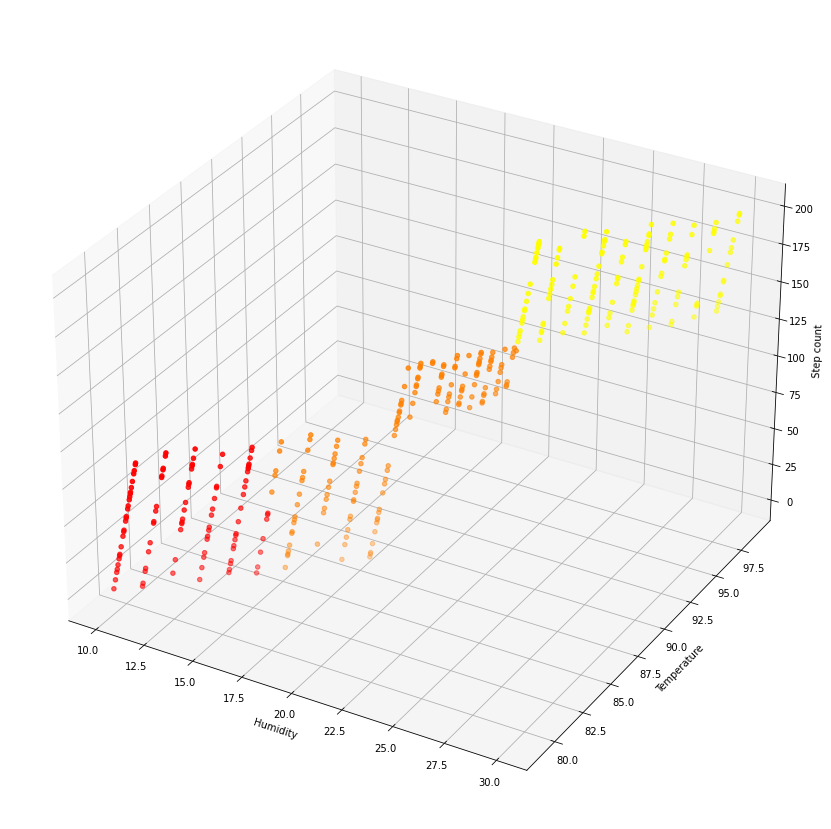

In [118]:
plotter = pyplot.subplot(projection='3d')
plotter.scatter3D(Testing_Data.to_numpy()[:, 0], Testing_Data.to_numpy()[:, 1] ,Testing_Data.to_numpy()[:, 2],c=Testing_Data['Stress Level'], cmap='autumn')
plotter.set_xlabel('Humidity')
plotter.set_ylabel('Temperature')
plotter.set_zlabel('Step count')

## dividing the training data features and labels 👇 
this will be used for training of logistic regression model

In [57]:
training_Labels=Training_Data['Stress Level']
training_Features=Training_Data.drop(['Stress Level'],axis=1)

In [58]:
training_Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 215 to 1466
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Humidity     1600 non-null   float64
 1   Temperature  1600 non-null   float64
 2   Step count   1600 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 50.0 KB


In [37]:
training_Labels.value_counts()

1    598
2    537
0    365
Name: Stress Level, dtype: int64

## dividing the testing data features and labels 👇 
this will be used for testing the logistic regression model

In [38]:
testing_Labels=Testing_Data['Stress Level']
testing_Features=Testing_Data.drop(['Stress Level'],axis=1)

In [39]:
testing_Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 194 to 1777
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Humidity     501 non-null    float64
 1   Temperature  501 non-null    float64
 2   Step count   501 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 15.7 KB


In [40]:
testing_Labels.value_counts()

1    192
2    173
0    136
Name: Stress Level, dtype: int64

# Creating the logistic regression model instance(object) 👇

In [119]:
model=svm.SVC(kernel='rbf')

### fitting the model 👇

In [120]:
model.fit(training_Features,training_Labels)

SVC()

In [121]:
model.support_vectors_

array([[ 14.8 ,  83.8 ,  25.  ],
       [ 12.77,  81.77,   4.  ],
       [ 13.76,  82.76,  12.  ],
       ...,
       [ 22.91,  91.91, 130.  ],
       [ 22.93,  91.93, 132.  ],
       [ 23.67,  92.67, 135.  ]])

In [137]:
model.n_support_

array([245, 295,  54])

In [122]:
len(model.support_vectors_)

594

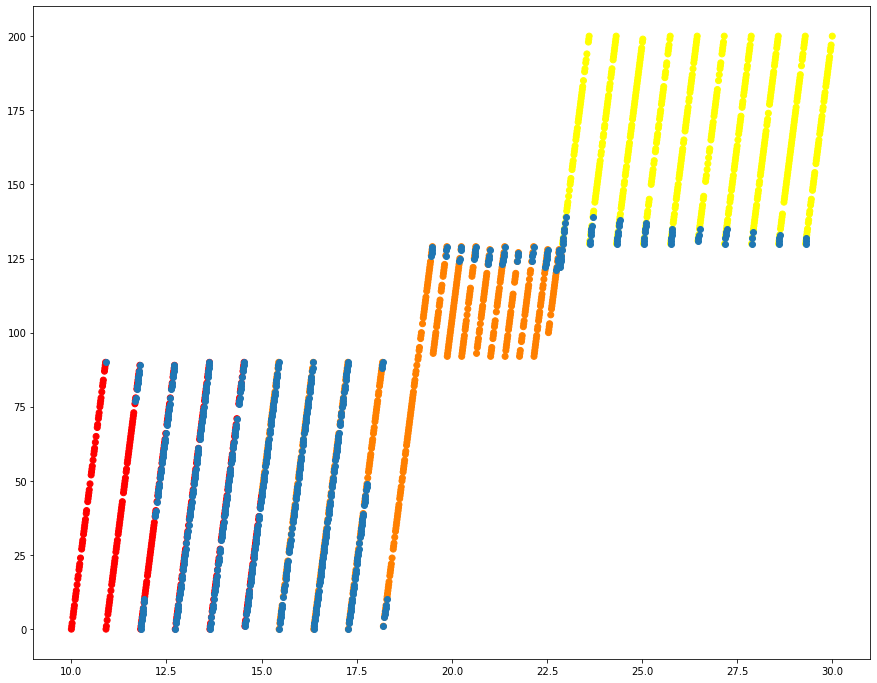

In [143]:
pyplot.scatter(training_Features.to_numpy()[:, 0],training_Features.to_numpy()[:, 2],c=training_Labels, cmap='autumn')
pyplot.scatter(model.support_vectors_[:,0],model.support_vectors_[:,2])

In [164]:
plotter = pyplot.subplot(projection='3d')
plotter.scatter3D(training_Features.to_numpy()[:, 0], training_Features.to_numpy()[:, 1] ,training_Features.to_numpy()[:, 2],c=training_Labels, cmap='autumn')
plotter.plot3D(model.support_vectors_[:,0],model.support_vectors_[:,1],model.support_vectors_[:,2])
plotter.set_xlabel('Humidity')
plotter.set_ylabel('Temperature')
plotter.set_zlabel('Step count')


Text(0.5, 0, 'Step count')

#### Now model is Trained 👆

## ________________________________________________________________________

## Optional Part 👇
### checking model on training data to check training accuracy (not needed)

               precision    recall  f1-score   support

   Low Stress       1.00      1.00      1.00       398
Normal Stress       1.00      1.00      1.00       634
  High Stress       1.00      1.00      1.00       568

     accuracy                           1.00      1600
    macro avg       1.00      1.00      1.00      1600
 weighted avg       1.00      1.00      1.00      1600



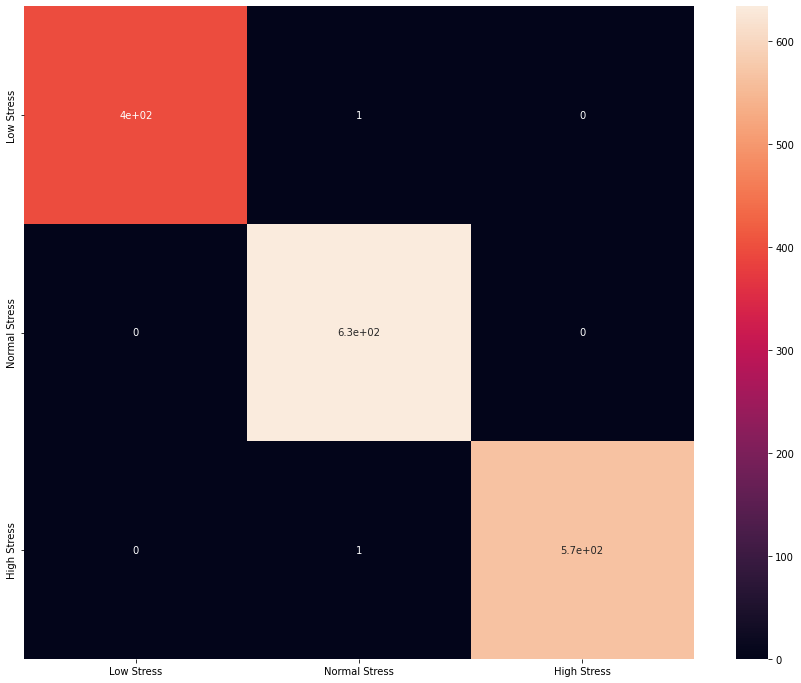

In [126]:
training_predicted_values=model.predict(training_Features)
training_classification_data=confusion_matrix(training_Labels,training_predicted_values)
seaborn.heatmap(training_classification_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
print(classification_report(training_Labels,training_predicted_values,target_names=classes_list))

Training accuracy is 95%

# ________________________________________

# Now Testing the model 👇

In [127]:
predicted_values=model.predict(testing_Features)

In [128]:
predicted_values

array([0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       1, 2, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2,
       2, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       2, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2,
       1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0, 2, 1, 1,
       1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1, 0, 0, 1, 0, 2, 2, 1, 0,
       2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1, 0, 2,
       0, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 1, 1, 0, 2,
       2, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2, 2, 2, 0, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 0,

### Following will show that what is actual value and what is predicted by model 👇

In [129]:
predicted_values=list(predicted_values)
testing_Labels=list(testing_Labels)
print("Actual Values --> Predicted values")
for i in range(len(predicted_values)):
    print("          ",testing_Labels[i]," --> ",predicted_values[i])

Actual Values --> Predicted values
           0  -->  0
           1  -->  1
           1  -->  1
           2  -->  2
           2  -->  2
           0  -->  0
           0  -->  0
           1  -->  1
           1  -->  1
           2  -->  2
           1  -->  1
           2  -->  2
           0  -->  0
           0  -->  0
           0  -->  0
           0  -->  0
           2  -->  2
           0  -->  0
           0  -->  0
           2  -->  2
           0  -->  0
           0  -->  0
           1  -->  1
           2  -->  2
           0  -->  0
           1  -->  1
           1  -->  1
           0  -->  0
           0  -->  0
           0  -->  0
           2  -->  2
           2  -->  2
           2  -->  2
           1  -->  1
           1  -->  1
           0  -->  0
           2  -->  2
           2  -->  2
           0  -->  0
           1  -->  1
           1  -->  1
           2  -->  2
           0  -->  0
           0  -->  0
           2  -->  2
           2  -->  2

## plotting the confusion matrix for model of tested data 👇

In [130]:
classification_data=confusion_matrix(testing_Labels,predicted_values)

In [131]:
classification_data

array([[136,   0,   0],
       [  0, 192,   0],
       [  0,   0, 173]], dtype=int64)

In [163]:
%matplotlib qt
seaborn.heatmap(classification_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)


<AxesSubplot:>

## This is the calculation of accuracy of the model and precision of the respective classes 👇

In [134]:
print(classification_report(testing_Labels,predicted_values,target_names=classes_list))

               precision    recall  f1-score   support

   Low Stress       1.00      1.00      1.00       136
Normal Stress       1.00      1.00      1.00       192
  High Stress       1.00      1.00      1.00       173

     accuracy                           1.00       501
    macro avg       1.00      1.00      1.00       501
 weighted avg       1.00      1.00      1.00       501



## Testing on new Data 👇
for,


1) Humidity: 20    <br/>
2) Temperature: 95 <br/>
3) Step count: 200  <br/>



##### (Correct Output Should be High Stress)

In [165]:
new_data=[20,95,200]
print(classes_list[model.predict([new_data])[0]])

High Stress
